# Predict stock future behavior

Following the tutorial on [Github](https://github.com/dataquestio/project-walkthroughs/tree/master/stock) and [YouTube](https://www.youtube.com/watch?v=SYrFhugaoZk&list=PL6UJrXaOPPcEesMFPaieQJwnBvKiRH2tT&index=40).

I want to make money by buying stocks. Since I want to make money, I only want to buy stock on days when the price will go up. So, I want to create a machine learning algorithm to predict if the stock price will increase tomorrow. If the algorithm says that the price will increase, I'll buy stock. If the algorithm says that the price will go down, I won't do anything.

For this purpose, I want to maximize the `true positives` - days when the algorithm predicts that the price will go up, and it actually goes go up. Therefore, I'll be using `precision` as error metric for the algorithm. It is defined as:

<center> `precision` = `true positives / (false positives + true positives)` </center>
    
This will ensure that I minimize how much money I lose with false positives (days when we buy the stock, but the price actually goes down).

This means that I will have to accept a lot of `false negatives` - days when I predict that the price will go down, but it actually goes up. This is okay, since I'd rather minimize the potential losses than maximize the potential gains.

## Method
Before we get to the machine learning, we need to do a lot of work to acquire and clean up the data. Here are the steps we'll follow:
- Download historical stock prices from Yahoo finance
- Explore the data
- Setup the dataset to predict future prices using historical prices
- Test a machine learning model
- Setup a backtesting engine
- Improve the accuracy of the model
 
At the end, we'll document some potential future directions we can go in to improve the technique.

## Data
I will use Microsoft stock data since there is a long history of that.

In [6]:
#! pip install yfinance

# Import libraries and download data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import json
import os

The following cell is used if you have already downloaded the data as `.json` file. I won't use it.

In [7]:
"""
DATA_PATH = "msft_data.json"

if os.path.exists(DATA_PATH):
    # Read from file if we've already downloaded the data.
    with open(DATA_PATH) as f:
        msft_hist = pd.read_json(DATA_PATH)
else:
    msft = yf.Ticker("MSFT")
    msft_hist = msft.history(period="max")

    # Save file to json in case we need it later.  This prevents us from having to re-download it every time.
    msft_hist.to_json(DATA_PATH)
"""

'\nDATA_PATH = "msft_data.json"\n\nif os.path.exists(DATA_PATH):\n    # Read from file if we\'ve already downloaded the data.\n    with open(DATA_PATH) as f:\n        msft_hist = pd.read_json(DATA_PATH)\nelse:\n    msft = yf.Ticker("MSFT")\n    msft_hist = msft.history(period="max")\n\n    # Save file to json in case we need it later.  This prevents us from having to re-download it every time.\n    msft_hist.to_json(DATA_PATH)\n'

In [9]:
msft = yf.Ticker("MSFT")
msft_hist = msft.history(period="max")

# Explore the data

In [14]:
type(msft_hist), msft_hist.shape

(pandas.core.frame.DataFrame, (9835, 7))

In [16]:
msft_hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13 00:00:00-05:00,0.054376,0.062373,0.054376,0.059707,1031788800,0.0,0.0
1986-03-14 00:00:00-05:00,0.059707,0.062906,0.059707,0.061839,308160000,0.0,0.0
1986-03-17 00:00:00-05:00,0.061839,0.063439,0.061839,0.062906,133171200,0.0,0.0
1986-03-18 00:00:00-05:00,0.062906,0.063439,0.060773,0.061306,67766400,0.0,0.0
1986-03-19 00:00:00-05:00,0.061306,0.061839,0.059707,0.060240,47894400,0.0,0.0


<Axes: xlabel='Date'>

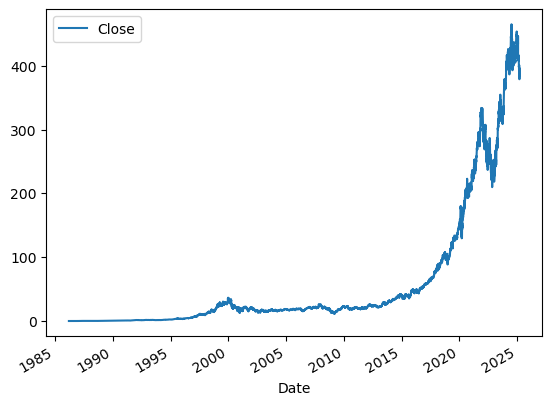

In [22]:
msft_hist.plot.line(y='Close', use_index=True)